# Ternary plots of cluster analysis results 

This notebook supports the publication:

An Inter-Laboratory Comparative High Throughput Experimental Study of Zn-Sn-Ti-O Thin Films

J. R. Hattrick-Simpers<sup>1</sup>, A. Zakutayev<sup>2</sup>, S. C. Barron<sup>1</sup>, Z. T. Trautt<sup>1</sup>, N. Nguyen<sup>1</sup>, K. Choudhary<sup>1</sup>, B. DeCost<sup>1</sup>, C. Phillips<sup>2</sup>, A. G. Kusne<sup>1</sup>, F. Yi<sup>1</sup>, A. Mehta<sup>3</sup>, I. Takeuchi<sup>4</sup>, J. D.Perkins<sup>2</sup>, M. L. Green<sup>1</sup>

1. National Institute of Standards and Technology (NIST), Gaithersburg, MD

1. National Renewable Energy Laboratory (NREL), Golden, CO

1. SLAC National Accelerator Laboratory, Menlo Park, CA

1. University of Maryland, College Park, MD

Contact: [htems@nist.gov](mailto:htems@nist.gov)

# Imports and Functions

In [1]:
import requests
requests.packages.urllib3.disable_warnings()
import json
from collections import OrderedDict
import matplotlib
import matplotlib.pyplot as plt
from ternarpy import * # Downloaded on June 6, 2018 from https://libraries.io/github/PhaethonPrime/ternarpy
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def check_response(r,quiet=False):
    try:
        r_content = r.json(object_pairs_hook=OrderedDict)
    except:
        r_content = r.text
    if str(r.status_code)[0] is not "2":
        if not quiet: print("Error: ",r.status_code) 
        if not quiet: print(r.text)
    else:
        return r_content

In [3]:
def mdcs_query(host,query,format='json'):
    url = host.strip("/") + "/rest/explore/query-by-example"
    data = dict()
    data['query'] = query
    data['dataformat'] = format
    r = requests.post(url, data=data, verify=False) # This needs to be fixed
    return check_response(r)

# Plot Ternary Clusters

In [4]:
NREL_data = pd.read_csv('NREL-cluster-NIST.csv')

In [5]:
NIST_data = pd.read_csv('NIST-cluster-NIST.csv')

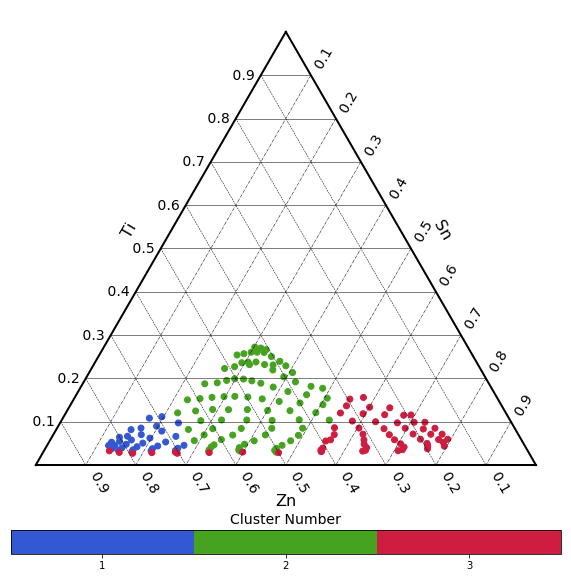

In [6]:
my_columns = ["Ti","Zn","Sn","Cluster"]
basis = make_basis()
X = NREL_data[my_columns[0:3]].as_matrix()
Xt = transform(X,basis)

colorsListNREL = [
    (52./255,87./255,210./255),
    (69./255,163./255,32./255),
    (205./255,30./255,65./255)]
CustomCmap = matplotlib.colors.ListedColormap(colorsListNREL)

fig, ax = pylab.subplots(figsize=(10,10))
setup_plot(ax, side_labels=my_columns[0:3], grid_values=np.arange(0.1,1,0.1),label_offset=0.25)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.6)
points = ax.scatter(Xt[:,0],Xt[:,1],c=NREL_data['Cluster'], cmap=CustomCmap, vmin=.5, vmax=3.5);
plt.colorbar(points,cax=cax,orientation="horizontal",ticks=[1,2,3]).ax.set_title('Cluster Number', size=14)
plt.savefig("cluster-NREL-NIST.pdf", bbox_inches='tight')
plt.show(points)

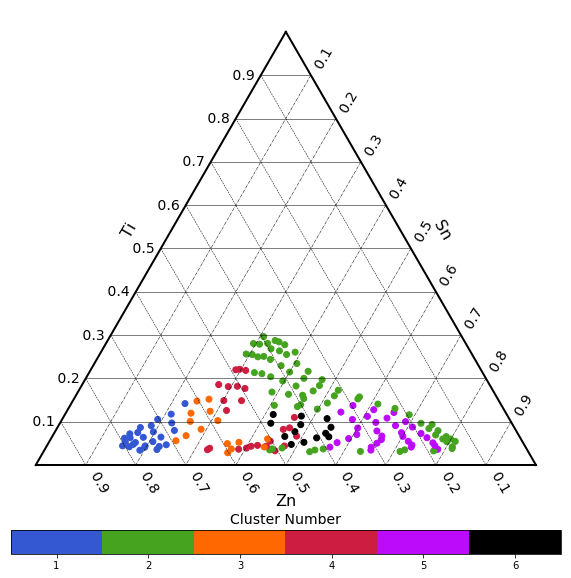

In [7]:
my_columns = ["Ti","Zn","Sn","Cluster"]
basis = make_basis()
X = NIST_data[my_columns[0:3]].as_matrix()
Xt = transform(X,basis)

colorsListNIST = [
    (52./255,87./255,210./255),
    (69./255,163./255,32./255),
    (1,103./255,0),
    (205./255,30./255,65./255),
    (188./255,10./255,251./255),
    (0,0,0)]
CustomCmap = matplotlib.colors.ListedColormap(colorsListNIST)

fig, ax = pylab.subplots(figsize=(10,10))
setup_plot(ax, side_labels=my_columns[0:3], grid_values=np.arange(0.1,1,0.1),label_offset=0.25)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.6)
points = ax.scatter(Xt[:,0],Xt[:,1],c=NIST_data['Cluster'], cmap=CustomCmap, vmin=.5, vmax=6.5);
plt.colorbar(points,cax=cax,orientation="horizontal",ticks=[1,2,3,4,5,6]).ax.set_title('Cluster Number', size=14)
plt.savefig("cluster-NIST-NIST.pdf", bbox_inches='tight')
plt.show(points)

# Get XRD Data

In [8]:
host = "https://hte.registry.nist.gov/"

In [9]:
def xrd_query(lib_id,point_id):
    query = '{ "$and": [{"content.library-xray-diffraction-measurement.sample.identifier.id":"'+lib_id+'"},{"content.library-xray-diffraction-measurement.point.identifier.id":'+point_id+'}]}'
    return query


In [10]:
# NREL
query = xrd_query("20.500.12048/lib.2015.1b",str(20))
query_response = mdcs_query(host,query)
NREL_cluster_1_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

query = xrd_query("20.500.12048/lib.2015.1b",str(71))
query_response = mdcs_query(host,query)
NREL_cluster_2_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

query = xrd_query("20.500.12048/lib.2015.1b",str(146))
query_response = mdcs_query(host,query)
NREL_cluster_3_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

In [11]:
# NIST
query = xrd_query("20.500.12048/lib.2015.1a",str(14))
query_response = mdcs_query(host,query)
NIST_cluster_1_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

query = xrd_query("20.500.12048/lib.2015.1a",str(177))
query_response = mdcs_query(host,query)
NIST_cluster_2_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

query = xrd_query("20.500.12048/lib.2015.1a",str(32))
query_response = mdcs_query(host,query)
NIST_cluster_3_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

query = xrd_query("20.500.12048/lib.2015.1a",str(7))
query_response = mdcs_query(host,query)
NIST_cluster_4_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

query = xrd_query("20.500.12048/lib.2015.1a",str(159))
query_response = mdcs_query(host,query)
NIST_cluster_5_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

query = xrd_query("20.500.12048/lib.2015.1a",str(104))
query_response = mdcs_query(host,query)
NIST_cluster_6_data = query_response[0]['content']['library-xray-diffraction-measurement']['data']

# Plot XRD Data

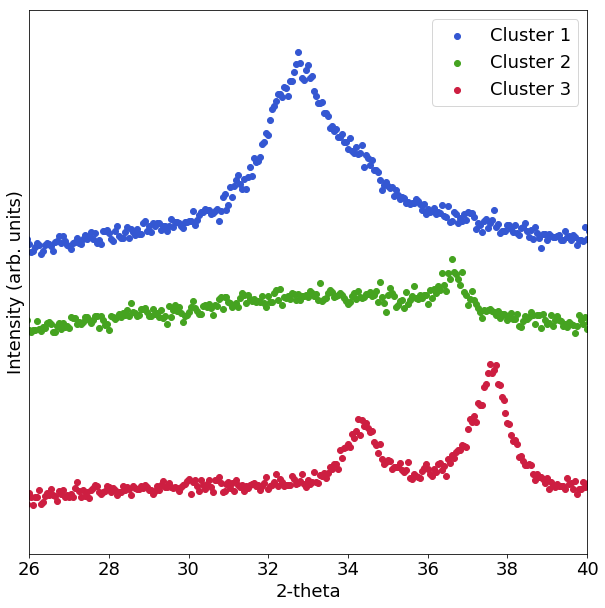

In [12]:
font = {'size'   : 18}
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
ax = plt.axes()
plt.scatter(NREL_cluster_1_data['angle-2-theta']['value'],np.array(NREL_cluster_1_data['intensity']['value'])+45000, label = "Cluster 1", color=colorsListNREL[0])
plt.scatter(NREL_cluster_2_data['angle-2-theta']['value'],np.array(NREL_cluster_2_data['intensity']['value'])+30000, label = "Cluster 2", color=colorsListNREL[1])
plt.scatter(NREL_cluster_3_data['angle-2-theta']['value'],np.array(NREL_cluster_3_data['intensity']['value']), label = "Cluster 3", color=colorsListNREL[2])
plt.legend()
plt.xlabel('2-theta')
plt.ylabel('Intensity (arb. units)')
plt.xlim(26, 40)
plt.ylim(10000, 110000)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.savefig("cluster-NREL-NIST-XRD.pdf", bbox_inches='tight')
plt.show()

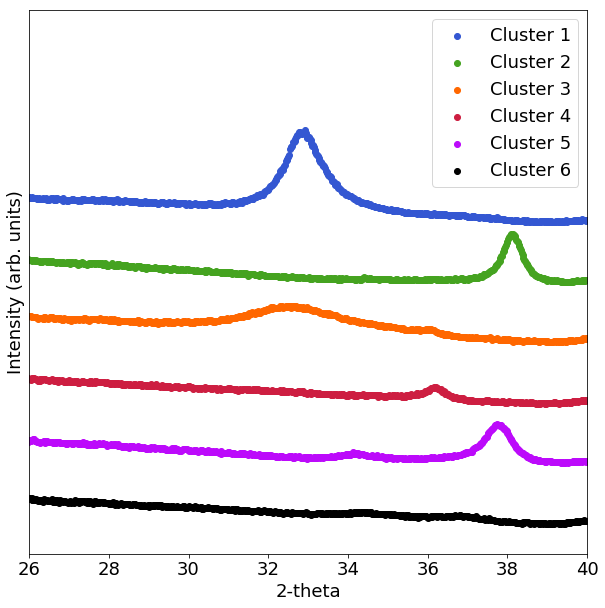

In [13]:
font = {'size'   : 18}
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
ax = plt.axes()
plt.scatter(NIST_cluster_1_data['angle-2-theta']['value'],np.array(NIST_cluster_1_data['intensity']['value'])+5000, label = "Cluster 1", color=colorsListNIST[0])
plt.scatter(NIST_cluster_2_data['angle-2-theta']['value'],np.array(NIST_cluster_2_data['intensity']['value'])+4000, label = "Cluster 2", color=colorsListNIST[1])
plt.scatter(NIST_cluster_3_data['angle-2-theta']['value'],np.array(NIST_cluster_3_data['intensity']['value'])+3000, label = "Cluster 3", color=colorsListNIST[2])
plt.scatter(NIST_cluster_4_data['angle-2-theta']['value'],np.array(NIST_cluster_4_data['intensity']['value'])+2000, label = "Cluster 4", color=colorsListNIST[3])
plt.scatter(NIST_cluster_5_data['angle-2-theta']['value'],np.array(NIST_cluster_5_data['intensity']['value'])+1000, label = "Cluster 5", color=colorsListNIST[4])
plt.scatter(NIST_cluster_6_data['angle-2-theta']['value'],np.array(NIST_cluster_6_data['intensity']['value']), label = "Cluster 6", color=colorsListNIST[5])
plt.legend()
plt.xlabel('2-theta')
plt.ylabel('Intensity (arb. units)')
plt.xlim(26, 40)
plt.ylim(0, 9000)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.savefig("cluster-NIST-NIST-XRD.pdf", bbox_inches='tight')
plt.show()

# Get Optical Data

In [14]:
def optical_query(lib_id,point_id):
    query = '{ "$and": [{"content.library-spectra-measurement.sample.identifier.id":"'+lib_id+'"},{"content.library-spectra-measurement.point.identifier.id":'+point_id+'}]}'
    return query


In [15]:
# NREL
query = optical_query("20.500.12048/lib.2015.1b",str(20))
query_response = mdcs_query(host,query)
NREL_cluster_1_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

query = optical_query("20.500.12048/lib.2015.1b",str(71))
query_response = mdcs_query(host,query)
NREL_cluster_2_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

query = optical_query("20.500.12048/lib.2015.1b",str(146))
query_response = mdcs_query(host,query)
NREL_cluster_3_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

In [16]:
# NIST
query = optical_query("20.500.12048/lib.2015.1a",str(14))
query_response = mdcs_query(host,query)
NIST_cluster_1_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

query = optical_query("20.500.12048/lib.2015.1a",str(177))
query_response = mdcs_query(host,query)
NIST_cluster_2_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

query = optical_query("20.500.12048/lib.2015.1a",str(32))
query_response = mdcs_query(host,query)
NIST_cluster_3_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

query = optical_query("20.500.12048/lib.2015.1a",str(7))
query_response = mdcs_query(host,query)
NIST_cluster_4_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

query = optical_query("20.500.12048/lib.2015.1a",str(159))
query_response = mdcs_query(host,query)
NIST_cluster_5_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

query = optical_query("20.500.12048/lib.2015.1a",str(104))
query_response = mdcs_query(host,query)
NIST_cluster_6_data_opt = query_response[0]['content']['library-spectra-measurement']['data']

# Plot Optial Data

In [17]:
# NREL to do

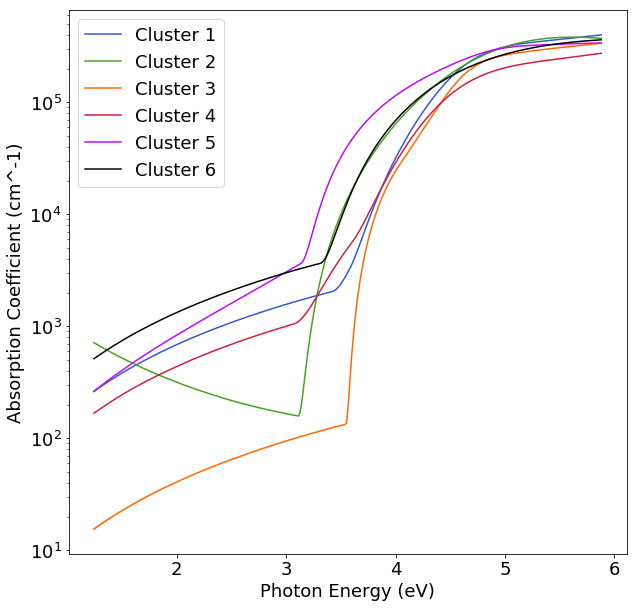

In [18]:
font = {'size'   : 18}
matplotlib.rc('font', **font)
plt.figure(figsize=(10,10))
ax = plt.axes()
plt.plot(NIST_cluster_1_data_opt['energy']['value'],np.array(NIST_cluster_1_data_opt['absorption-coefficient']['value']), label = "Cluster 1", color=colorsListNIST[0])
plt.plot(NIST_cluster_2_data_opt['energy']['value'],np.array(NIST_cluster_2_data_opt['absorption-coefficient']['value']), label = "Cluster 2", color=colorsListNIST[1])
plt.plot(NIST_cluster_3_data_opt['energy']['value'],np.array(NIST_cluster_3_data_opt['absorption-coefficient']['value']), label = "Cluster 3", color=colorsListNIST[2])
plt.plot(NIST_cluster_4_data_opt['energy']['value'],np.array(NIST_cluster_4_data_opt['absorption-coefficient']['value']), label = "Cluster 4", color=colorsListNIST[3])
plt.plot(NIST_cluster_5_data_opt['energy']['value'],np.array(NIST_cluster_5_data_opt['absorption-coefficient']['value']), label = "Cluster 5", color=colorsListNIST[4])
plt.plot(NIST_cluster_6_data_opt['energy']['value'],np.array(NIST_cluster_6_data_opt['absorption-coefficient']['value']), label = "Cluster 6", color=colorsListNIST[5])
plt.legend()
plt.xlabel('Photon Energy (eV)')
plt.ylabel('Absorption Coefficient (cm^-1)')
ax.set_yscale('log')
plt.savefig("cluster-NIST-NIST-Optical.pdf", bbox_inches='tight')
plt.show()